In [1]:
# Add project path to the PYTHONPATH

import os
import sys
from pathlib import Path

sys.path.append(Path(os.path.join(os.path.abspath(''), '../')).resolve().as_posix())

In [2]:
import numpy as np
import pandas as pd

In [3]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [4]:
import nltk
import string

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.style.use('fivethirtyeight')

In [5]:
df = pd.read_csv('../datasets/tweepy/1151228313119145984-1149072876504539136_:pouting_face:.csv')

In [6]:
df.head()

,id,date,user,text
0,1151228313119145984,2019-07-16 20:33:13,lolo69inla,PLEASE ENOUGH! with the Exposure for the pedop...
1,1151228310182977537,2019-07-16 20:33:12,nottibbunny,i feel like toy story is real but with my wall...
2,1151228303858196480,2019-07-16 20:33:11,ty_shols,I don’t understand why he’s so aggressive tow...
3,1151228300200730625,2019-07-16 20:33:10,benfaygo,@seanhannity He’s lost it! Bizzaro uncle Joe!😡...
4,1151228295087702017,2019-07-16 20:33:08,_memeuslut,@JayFromTGF say brighton even if u dont live t...


In [7]:
from nlp.utils import preprocess

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/rmohashi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
preprocessed_data = preprocess(df.text)

Time to clean up: 0.87 sec


In [9]:
preprocessed_data.head()

0    please enough exposure pedophile degenerate ep...
1    feel like toy story real wallet keys etc alway...
2    not understand he's aggressive towards mehek d...
3    he's lost bizzaro uncle joe :pouting_face: :th...
4    say brighton even u dont live there:pouting_fa...
Name: text, dtype: object

In [10]:
tfidf_vectorizer = TfidfVectorizer(
    min_df = 3,
    max_df = 0.95,
    max_features = 8000
)
tfidf = tfidf_vectorizer.fit_transform(preprocessed_data)

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


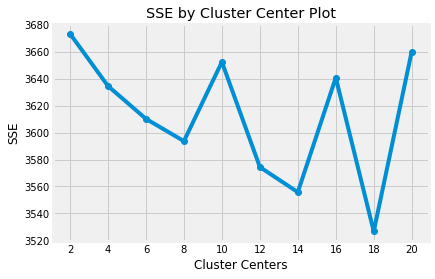

In [11]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(tfidf, 20)

In [15]:
clusters = MiniBatchKMeans(n_clusters=8, init_size=1024, batch_size=2048, random_state=20).fit_predict(tfidf)

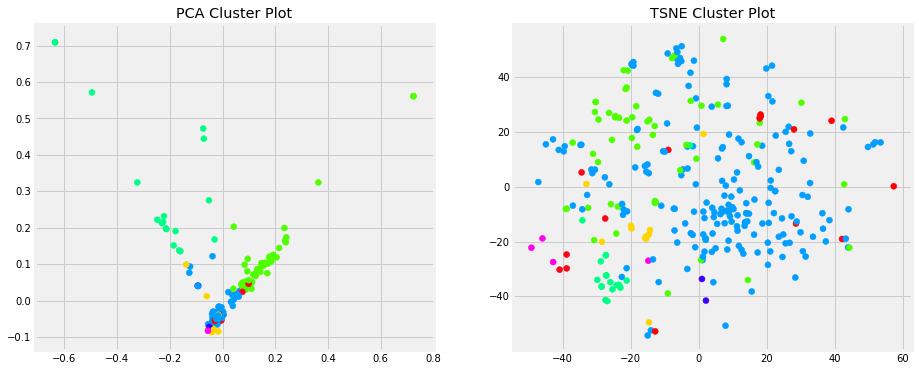

In [16]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=2000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(tfidf, clusters)

In [20]:
counts = np.bincount(clusters)
print(np.argmax(counts))

4
